In [1]:
#pip install selenium
#pip install pyyaml ua-parser user-agents fake-useragent

0. Web scraping

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from fake_useragent import UserAgent
import pandas as pd

# Setting up the chrome driver: pretend to be an organic user
options = Options()
ua = UserAgent()
a = ua.random
user_agent = ua.random
options.add_argument(f'user-agent={user_agent}')
    
# The url for scraping
soup = []
for index in range(1,101): #Scraping multiple pages of a website
    url = 'https://xe.chotot.com/mua-ban-xe-may?page={0}'.format(index)
    driver = webdriver.Chrome(options=options, executable_path=r'D:\Software\chromedriver_win32 chrome_97\chromedriver.exe')
    driver.get(url)
    data = driver.page_source
    soup_index = BeautifulSoup(data, 'html.parser') # --> Data is stored in soup
    soup.append(soup_index)

C:\Users\MINH\AppData\Local\Temp/ipykernel_38468/60369201.py:18: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(options=options, executable_path=r'D:\Software\chromedriver_win32 chrome_97\chromedriver.exe')


<html lang="vi"><head><link href="https://www.chotot.com/chotot-img/favicon.ico" rel="shortcut icon"/><link href="https://static.chotot.com" rel="preconnect"/><link href="https://adservice.google.com" rel="preconnect"/><link href="https://adservice.google.com.vn" rel="preconnect"/><link href="https://www.googletagmanager.com" rel="preconnect"/><link href="https://www.google-analytics.com" rel="preconnect"/><link href="https://securepubads.g.doubleclick.net" rel="preconnect"/><link href="https://tpc.googlesyndication.com" rel="preconnect"/><link href="https://static.chotot.com/" rel="dns-prefetch"/><link href="https://fonts.gstatic.com/" rel="dns-prefetch"/><link href="https://use.fontawesome.com/" rel="dns-prefetch"/><link href="https://fonts.googleapis.com/" rel="dns-prefetch"/><link href="https://anymind360.com/" rel="dns-prefetch"/><link href="https://securepubads.g.doubleclick.net/" rel="dns-prefetch"/><link href="https://www.googletagmanager.com/" rel="dns-prefetch"/><link href="h
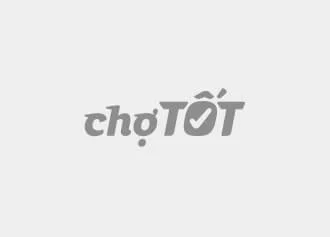
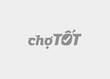
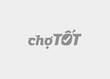

In [3]:
soup[0]

1. Body of the dataframe

In [4]:
# name
product_name_list = []
# information
product_infor_list = []
# price
product_price_list = []

2. Get the data for the dataframe

In [5]:
# 1. Get the product name
print('Product name: ' + soup[0].select('a[class*="AdItem_adItem__2O28x"]')[0].select('h3[class*="commonStyle_adTitle__1VYG8"]')[0].text.strip())

# 2. Get the product information
print('Product informaion: ' + soup[0].select('a[class*="AdItem_adItem__2O28x"]')[0].select('span[class*="AdBody_adItemCondition__2aNPA"]')[0].text)

# 3. Get the product price
print('Product price: ' + soup[0].select('a[class*="AdItem_adItem__2O28x"]')[0].select('p[class*="AdBody_adPriceNormal__2_jeN"]')[0].text)

Product name: Wave s110 giấy tờ hợp lệ
Product informaion: 2012 - Xe số - Đã sử dụng
Product price: 5.600.000 đ


In [6]:
for soup_i in soup:
    for product_dtl in soup_i.select('a[class*="AdItem_adItem__2O28x"]'):

        #1. Get the name
        product_name_list.append(product_dtl.select('h3[class*="commonStyle_adTitle__1VYG8"]')[0].text.strip())

        #2. Get the information
        if len(product_dtl.select('span[class*="AdBody_adItemCondition__2aNPA"]')) == 0:
            product_infor_list.append(None)
        else:
            product_infor_list.append(product_dtl.select('span[class*="AdBody_adItemCondition__2aNPA"]')[0].text)

        #3. Get the price
        if len(product_dtl.select('p[class*="AdBody_adPriceNormal__2_jeN"]')) == 0:
            product_price_list.append(None)
        else:
            product_price_list.append(product_dtl.select('p[class*="AdBody_adPriceNormal__2_jeN"]')[0].text)

3. Construct the dataframe

In [7]:
#import pandas as pd
dict_to_df = {'product_name': product_name_list,'product_infor': product_infor_list,'product_price': product_price_list}
df = pd.DataFrame(dict_to_df)
df.head()

,product_name,product_infor,product_price
0,Wave s110 giấy tờ hợp lệ,2012 - Xe số - Đã sử dụng,5.600.000 đ
1,"MUA XE HONDA CŨ,TẬN NHÀ",Đã sử dụng,58.000.000 đ
2,MUA XE CŨ TẬN NHÀ GIÁ CAO,2021 - Tay ga - Đã sử dụng,87.000.000 đ
3,"MUA MOTOR CŨ ,EM PHỤC PHỤ TẬN NƠI",Đã sử dụng,31.000.000 đ
4,VESPA ĐÈN VUÔNG BS 43 giao lưu,2011 - Tay ga - Đã sử dụng,17.500.000 đ


In [8]:
df = df.join(
    df['product_infor'].str.split(' - ', expand=True).rename(
        columns={0:'product_year', 1:'product_type', 2:'product_condition'}
        )
    )
df.head()

,product_name,product_infor,product_price,product_year,product_type,product_condition
0,Wave s110 giấy tờ hợp lệ,2012 - Xe số - Đã sử dụng,5.600.000 đ,2012,Xe số,Đã sử dụng
1,"MUA XE HONDA CŨ,TẬN NHÀ",Đã sử dụng,58.000.000 đ,Đã sử dụng,None,None
2,MUA XE CŨ TẬN NHÀ GIÁ CAO,2021 - Tay ga - Đã sử dụng,87.000.000 đ,2021,Tay ga,Đã sử dụng
3,"MUA MOTOR CŨ ,EM PHỤC PHỤ TẬN NƠI",Đã sử dụng,31.000.000 đ,Đã sử dụng,None,None
4,VESPA ĐÈN VUÔNG BS 43 giao lưu,2011 - Tay ga - Đã sử dụng,17.500.000 đ,2011,Tay ga,Đã sử dụng


In [9]:
df['sell_buy'] = ''
for i in df.index:
    
    # Change product_price type:
    if df['product_price'][i] == None:
        df['product_price'][i] = 0
    else:
        df['product_price'][i] = df['product_price'][i].replace('.', '').replace(' đ', '')
     
    # Add column 'sell_buy':
    if df['product_condition'][i] == None:
        df['product_condition'][i] = df['product_year'][i]
        df['product_year'][i] = None
        df['sell_buy'][i] = 'Mua'
    else:
        df['sell_buy'][i] = 'Bán'

df['product_price'] = pd.to_numeric(df['product_price'])
df.head()

,product_name,product_infor,product_price,product_year,product_type,product_condition,sell_buy
0,Wave s110 giấy tờ hợp lệ,2012 - Xe số - Đã sử dụng,5600000,2012,Xe số,Đã sử dụng,Bán
1,"MUA XE HONDA CŨ,TẬN NHÀ",Đã sử dụng,58000000,None,None,Đã sử dụng,Mua
2,MUA XE CŨ TẬN NHÀ GIÁ CAO,2021 - Tay ga - Đã sử dụng,87000000,2021,Tay ga,Đã sử dụng,Bán
3,"MUA MOTOR CŨ ,EM PHỤC PHỤ TẬN NƠI",Đã sử dụng,31000000,None,None,Đã sử dụng,Mua
4,VESPA ĐÈN VUÔNG BS 43 giao lưu,2011 - Tay ga - Đã sử dụng,17500000,2011,Tay ga,Đã sử dụng,Bán


In [10]:
df = df[df['product_price'] < 1000000000]

In [11]:
df

,product_name,product_infor,product_price,product_year,product_type,product_condition,sell_buy
0,Wave s110 giấy tờ hợp lệ,2012 - Xe số - Đã sử dụng,5600000,2012,Xe số,Đã sử dụng,Bán
1,"MUA XE HONDA CŨ,TẬN NHÀ",Đã sử dụng,58000000,None,None,Đã sử dụng,Mua
2,MUA XE CŨ TẬN NHÀ GIÁ CAO,2021 - Tay ga - Đã sử dụng,87000000,2021,Tay ga,Đã sử dụng,Bán
3,"MUA MOTOR CŨ ,EM PHỤC PHỤ TẬN NƠI",Đã sử dụng,31000000,None,None,Đã sử dụng,Mua
4,VESPA ĐÈN VUÔNG BS 43 giao lưu,2011 - Tay ga - Đã sử dụng,17500000,2011,Tay ga,Đã sử dụng,Bán
...,...,...,...,...,...,...,...
2005,sy ý nhập khẩu nguyên con chính chủ,2005 - Tay ga - Đã sử dụng,52000000,2005,Tay ga,Đã sử dụng,Bán
2006,❤Vision đời 2018 Bao Đẹp bstp chính chủ hỗ trợ...,2018 - Tay ga - Đã sử dụng,26900000,2018,Tay ga,Đã sử dụng,Bán
2007,Honda Vision 110cc 2012 bstp 196.61 giá rẻ 14tr5,2012 - Tay ga - Đã sử dụng,14500000,2012,Tay ga,Đã sử dụng,Bán
2008,Honda Airblade 110cc lên 2 đèn thái bstp 380.18,2008 - Tay ga - Đã sử dụng,13500000,2008,Tay ga,Đã sử dụng,Bán


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2009
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_name       2008 non-null   object
 1   product_infor      2008 non-null   object
 2   product_price      2008 non-null   int64 
 3   product_year       1990 non-null   object
 4   product_type       1990 non-null   object
 5   product_condition  2008 non-null   object
 6   sell_buy           2008 non-null   object
dtypes: int64(1), object(6)
memory usage: 125.5+ KB


In [13]:
df.describe()

,product_price
count,2.008000e+03
mean,3.327862e+07
std,5.379253e+07
min,0.000000e+00
25%,1.027500e+07
50%,1.940000e+07
75%,3.550000e+07
max,9.900000e+08


4. Push the data to SQL Server

In [14]:
import pyodbc

# creating a new db and a new table
new_db_name = "ChoTot_Motor"
new_table_name = "ChoTot_Motor"
connection_string = "Driver=SQL Server;Server=DESKTOP-CF5UU1U\SQLEXPRESS;Database={0};Trusted_Connection=Yes;" 
                        # you can also swap Trusted_Connection for UID={your username};PWD={your password}
cnxn = pyodbc.connect(connection_string.format("master"), autocommit=True)
cnxn.cursor().execute('''IF EXISTS(SELECT * FROM sys.databases WHERE [name] = '{0}') DROP DATABASE {0}'''.format(new_db_name))
cnxn.cursor().execute("CREATE DATABASE " + new_db_name)
cnxn.cursor().execute("DROP TABLE IF EXISTS {0}".format(new_table_name))
cnxn.cursor().execute('''USE {1} CREATE TABLE {0}(
                                product_name nvarchar(100), product_infor nvarchar(50)
                                , product_price int, product_year nvarchar(20)
                                , product_type nvarchar(20), product_condition nvarchar(20)
                                , sell_buy nvarchar(5))'''.format(new_table_name, new_db_name))
for index, row in df.iterrows():
    cnxn.cursor().execute('''INSERT INTO dbo.{0}(
                                product_name, product_infor
                                , product_price, product_year
                                , product_type, product_condition
                                , sell_buy) values (?, ?, ?, ?, ?, ?, ?)'''.format(new_table_name)\
                          , row['product_name'], row['product_infor'], row['product_price']\
                          , row['product_year'], row['product_type'], row['product_condition'], row['sell_buy'])
    cnxn.commit()
cnxn.close()

print("Database and table created")

Database and table created


5. Export dataframe to .csv, .xlsx

In [15]:
#df.to_csv(path, index = False, encoding='utf-8')
#df.to_excel(path, index = False)

path = 'D:\#Tự học DA\Project\ChoTot_Motorbike\ChoTot_Motorbike.xlsx'

import os
if os.path.exists(path):
    os.remove(path)

df.to_excel(path, index = False)